# ***Autor: Rodrigo Ceacero***

# **Clasificación** de imágenes con **MNIST** y **Random Forest** 🌳

Este proyecto utiliza el dataset MNIST para entrenar un modelo de clasificación basado en Bosques Aleatorios. El objetivo es predecir correctamente dígitos manuscritos (0-9) y evaluar el rendimiento del modelo.

## Funcionamiento del modelo ❓

El modelo **RandomForestClassifier** funciona de la siguiente manera:

*   Se crea un conjunto de árboles (un hiperparámetro a definir en el entreno del modelo '*n_estimators*') que están formados por datos aleatorios del conjunto de datos elegido para el entrenamiento del modelo. Cada árbol contiene un conjunto de datos elegidos aleatoriamente del dataset, los datos se pueden repetir en los distintos árboles y cada árbol llega a una solución.
*   El resultado final del modelo se elige basándose en las respuestas de cada árbol, en este caso el resultado final será el más repetido, puesto que estamos en un modelo de clasificación, en caso de estar en un modelo de regresión el resultado sería una media de todas las soluciones de cada árbol.


## Importación de librerías 📗

La parte por la que empezamos en el proyecto es en la carga de las librerías necesarias para poder trabajar con los datos, entrenar el modelo y evaluarlo.

Algunas de las librerías que utilizamos en el proyecto son estas:

*   Pandas: útil en el trabajo con datos y su análisis.
*   Matplotlib.pyplot: útil para trabajar con gráficos.
*   Seaborn: para gráficos más avanzados.
*   Numpy: útil para trabajar con cálculos matemáticos sobre matrices.
*   train_test_split: útil para la división de datos para prueba y test a la hora de entrenar el modelo.
*   De sklearn.datasets, fetch_openml: la utilizamos para la carga del dataset, que en este caso lo haremos directamente desde Scikit Learn.
*   RandomForestClassifier: modelo de bosque aleatorio para clasificación.
*   accuracy_score: útil en la evaluación del modelo, sirve para analizar la precisión global de este.
*   confusion_matrix: útil en la evaluación del modelo, sirve para ver la matriz de confusión.
*   classification_report: útil en la evaluación del modelo, muetsra distintas métricas del modelo.


In [3]:
# Trabajo con Dataset
import pandas as pd

# Trabajo con gráficos y visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Trabajo con operaciones matemáticas
import numpy as np

# División de los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importación del dataset
from sklearn.datasets import fetch_openml

# Modelo de RandomForest en clasificación
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Importación de los datos 📥

Para obtener los datos de las imágenes de los números cargamos el dataset desde Scikit Learn utilizando '*fetch_openml*' y lo pasamos a un DataFrame de pandas para trabajar más fácilmente con él.

In [4]:
dataset_mnist = fetch_openml('mnist_784')

In [20]:
dataset = dataset_mnist.frame

## Preprocesamiento de datos 🧹

Una vez tenemos el dataset guardado en una variable '*dataset*' vamos a realizar algunos pasos para analizar el dataset y entender con que datos estamos trabajando. Para ello vamos a utilizar algunas funciones básicas de pandas que nos muestran la información principal e importante.

1.- Tamaño del dataset, que en este caso vemos que contiene 70.000 filas (imágenes) y 785 columnas, (784: cada uno de los píxeles de la imagen; 1: variable objetivo, es decir, el número que representa la imagen).

In [21]:
# Tamaño del dataset, expresado en filas y columnas.
dataset.shape

(70000, 785)

2.- Información principal del dataset.

In [22]:
# Información principal, entre ella vemos el tipo de datos que contiene el dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), int64(784)
memory usage: 418.8 MB


3.- Observación de algunos datos y sus características

In [23]:
# Observación de los 10 primeros datos con sus correspondientes características, con esto comprobamos la forma del dataset y de que manera se representan los datos.
dataset.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


4.- Información de los datos estadísticos de cada una de las columnas del dataset.

In [24]:
# Datos estadísticos del dataset (media, desviación típica, total, mínimo, máximo, cuartiles).
dataset.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


5.- Comprobación de nulos en el dataset, en caso de haber nulos, deberíamos realizar algunas operaciones para trabajar con ellos.

In [25]:
# Comprobación de datos nulos.
dataset.isnull().values.any()

np.False_

Como resumen de este dataset tras analizarlo, podemos ver que es un dataset que contiene 70.000 tuplas y cada una de ellas corresponde a una imagen de un número, representado por píxeles en las diferentes columnas (784), ya que una columna (*class*), es la que define el número que es.

Además, como información importante también vemos el número máximo y mínimo de los píxeles, lo que nos ayudará para la normalización.

## Normalización de los datos ⚖️

El siguiente paso es normalizar para tener los valores entre 0 y 1. De esta manera tenemos todos los valores en un mismo rango (0 y 1), evitando que una característica predomine sobre otra y a su vez mejoramos el rendimiento y la eficiencia del modelo.

Antes de normalizar, debemos separar los datos, entre variables independientes (X) y variable dependiente (y). Lo único que queremos normalizar son las variables independientes, que son las que entrenan el modelo.

In [26]:
# Variables inddependientes. 'Eliminamos' (ya que no especificamos un inplace=True) la columna del dataset 'class' y nos quedamos con el resto, asegurando obtener las variables predictoras.
X = dataset.drop('class', axis = 1)
# Variable dependiente. Obtenemos la característica 'class', la etiqueta que define el número
y = dataset['class']

Hay diferentes formas de normalizar los datos, pero en este caso al estar utilizando imágenes y saber el rango de los píxeles, es una buena manera hacerlo diviendo cada dato entre 255.

Otras maneras de hacerlo puede ser MinMaxScaler.

In [27]:
# Normalización de las características predictoras (píxeles).
X = X / 255

# Comprobación de los rangos mínimos y máximos una vez normalizado.
print("Mínimo:", X.min().min())
print("Máximo:", X.max().max())

Mínimo: 0.0
Máximo: 1.0


## Reducción del dataset para mejor entrenamiento ➖

Debido a la cantidad de datos que contiene el dataset, vamos a reducir la cantidad de datos con la que vamos a entrenar el modelo ya que así ahorramos tiempo de entreno y recursos.

Vamos a seleccionar solo 10.000 imágenes. Además, debemos asegurarnos que la variable '*y*' coincida con la variable '*X*'.

In [28]:
# Reducción de los datos para entrenar el modelo.
X_reduced = X.sample(n=10000, random_state=42)
y_reduced = y.iloc[X_reduced.index]

## División de los datos ✂️

Para el entreno del modelo debemos dividir los datos.

Vamos a usar el 70% de los datos para el entrenamiento y el 30% para las pruebas.

Además, al ser un modelo de clasificación usamos '*stratify*' para que la proporción de datos sea igual, es decir, para que no haya desbalanceo de carga.

In [29]:
# División de los datos en entrenamiento y test para el entrenamiento del modelo.
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size = 0.3, random_state = 40, stratify = y_reduced)

## Visualización gráfica de los datos 📊

Antes de entrenar el modelo, vamos a visualizar gráficamente algunos datos para entender los datos que estamos trabajando.

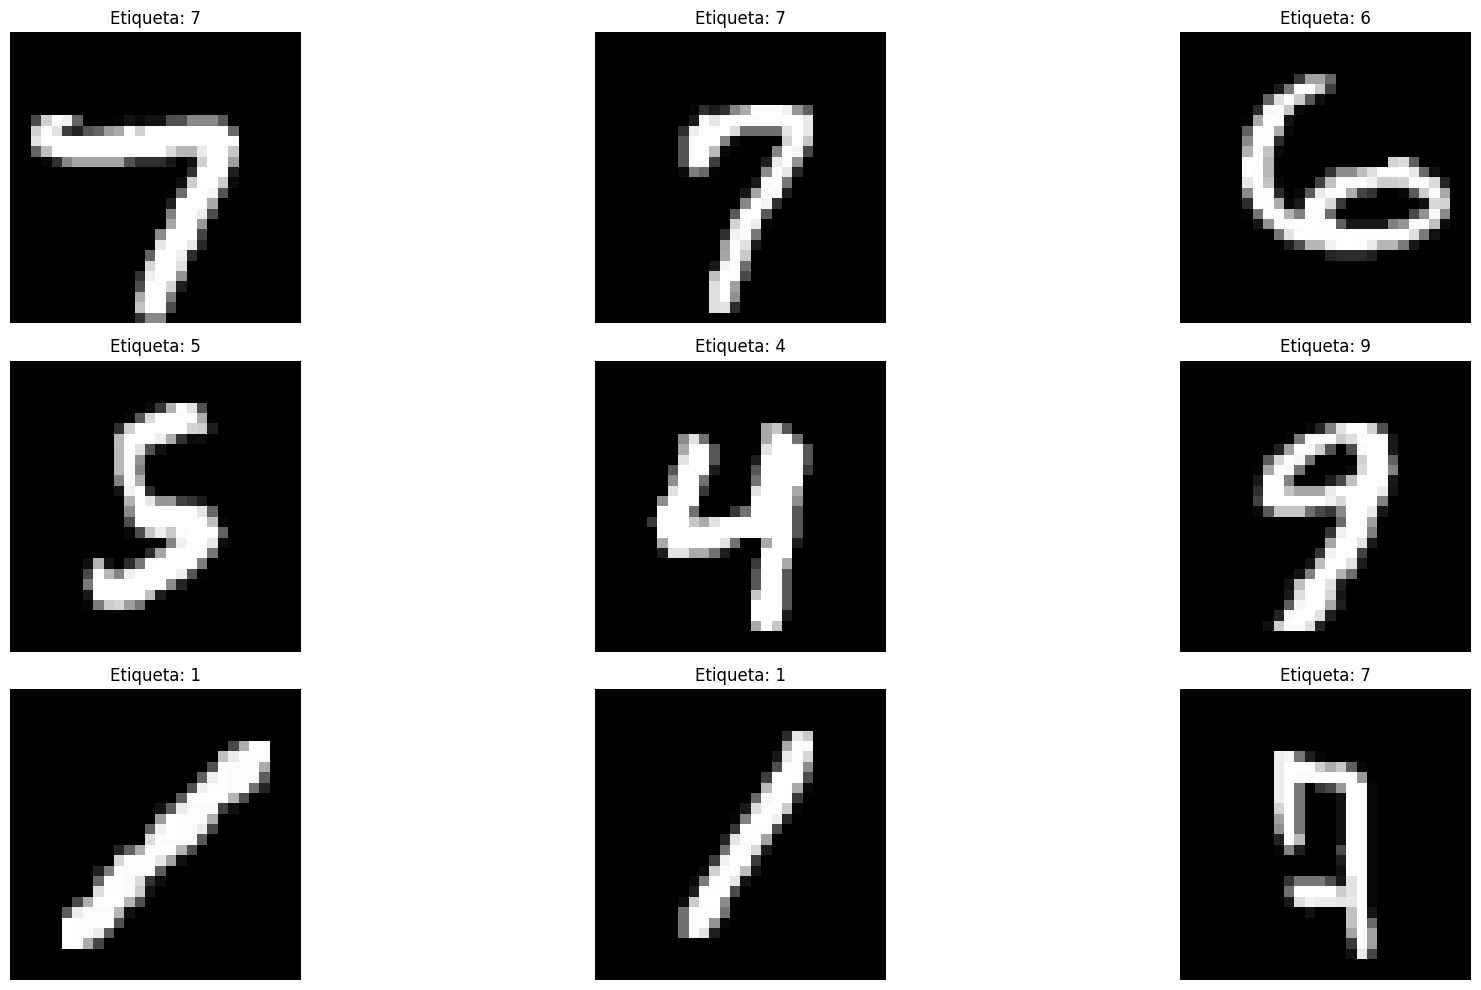

In [132]:
# Visualización gráfica de los datos
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f"Etiqueta: {y_train.iloc[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## Entrenamiento del modelo 🧠

El primer paso para entrenar el modelo es crear una instancia del objeto RandomForestClassifier. Como parámetros utilizaremos '*n_estimators*', para definir el número de árboles que se van a utilizar y '*max_depth*', para definir la profundidad máxima a la que va a llegar cada árbol.   

In [30]:
# Instanciamiento del modelo.
model = RandomForestClassifier(random_state = 42, n_estimators = 400, max_depth = 15)

Una vez instanciado el modelo, pasamos a entrenar el modelo con los datos de entrenamiento, previamente divididos.

In [32]:
# Entrenamiento del modelo.
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=400, random_state=42)

Una vez entrenado el modelo, debemos testear su funcionamiento.

Para ello realizamos una predicción pasando los datos que guardamos anteriormente para las pruebas.

In [33]:
# Predicción del modelo
prediction = model.predict(X_test)

Para comprobar algunos resultados del modelo podemos ver una comparativa entre los datos reales (*y_test*) y los datos predichos (*prediction*).  

In [67]:
# Comparación entre datos reales y predicción.
compare = pd.DataFrame({
    "Predicción": prediction,
    "Valor real": y_test
})

compare["Correcto"] = (compare["Predicción"] == compare["Valor real"]).map({
    True: "Sí",
    False: "No"
})

compare.head(50)

,Predicción,Valor real,Correcto
53663,8,8,Sí
22167,7,7,Sí
48172,4,4,Sí
69973,9,9,Sí
962,7,7,Sí
66350,6,6,Sí
38060,5,5,Sí
52688,6,6,Sí
24145,7,3,No
64381,5,5,Sí


## Evaluación del modelo ✅

El último paso es la evaluación del modelo.

Para ello vamos a ver algunas métricas de evaluación que nos van a especificar la calidad y precisión que tiene nuestro modelo.

### Informe de clasificación
Muestra las principales métricas de clasificación



In [96]:
# Informe de clasificación.
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       295
           1       0.95      0.97      0.96       346
           2       0.93      0.96      0.95       290
           3       0.95      0.91      0.93       310
           4       0.95      0.94      0.94       272
           5       0.93      0.93      0.93       281
           6       0.96      0.98      0.97       288
           7       0.93      0.94      0.93       316
           8       0.93      0.89      0.91       291
           9       0.91      0.92      0.92       311

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



### Precisión global

Muestra la precisión global del modelo.

In [95]:
# Evaluación de la precisión del modelo.
accuracy = accuracy_score(y_test, prediction)

print(f'Precisión global del modelo: {accuracy:.2f}')
print(f'Porcentaje de precisión: {accuracy * 100:.2f}%')

Precisión global del modelo: 0.94
Porcentaje de precisión: 94.23%


### Matriz de confusión

Con la matriz de confusión analizamos los aciertos y errores exactos que tiene el modelo y que números se confunden con otros.

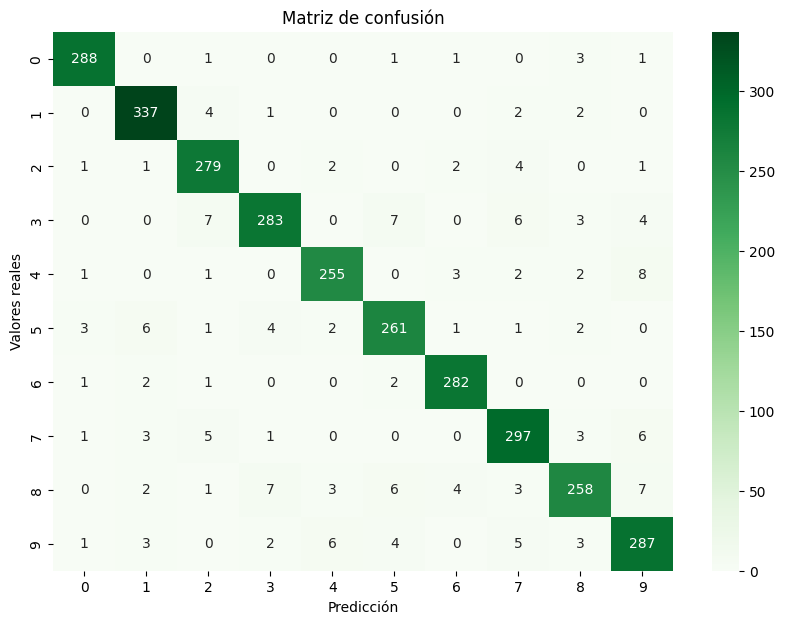

In [98]:
# Gráfico de la matriz de confusión.
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Valores reales")
plt.show()

## Resumen 🗒️

Como resumen de este proyecto podemos destacar:

- Objetivo: clasificación de imágenes de dígitos manuscritos.
- Dataset: MNIST (10.000 imágenes de dígitos del 0 al 9).
- Modelo utilizado: Random Forest con 400 árboles y profundidad máxima de 15.
- Precisión del modelo: 94,23%, indicando que es un modelo preciso y de calidad. ✅